## Importing The libraries

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy import stats
from datetime import datetime 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


## Importing The Data


In [306]:
df = pd.read_csv("taxi-rides.csv")
w = pd.read_csv("weather.csv")

## General Properties

In [307]:
df.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0


In [308]:
df.product_id.value_counts()

55c66225-fbe7-4fd5-9072-eab1ece5e23e    44204
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    44135
997acbb5-e102-41e1-b155-9df7de0a73f2    44108
6d318bcc-22a3-4af6-bddd-b409bfce1546    44038
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    44024
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43983
6c84fd89-3f11-4782-9b50-97c468b19529    43977
lyft_plus                               41142
lyft_lux                                41041
lyft                                    41015
lyft_luxsuv                             40979
lyft_premier                            40969
lyft_line                               40841
Name: product_id, dtype: int64

In [309]:
df.name.value_counts()

UberX           44204
Taxi            44135
UberPool        44108
Black SUV       44038
WAV             44024
UberXL          43983
Black           43977
Lyft XL         41142
Lux Black       41041
Lyft            41015
Lux Black XL    40979
Lux             40969
Shared          40841
Name: name, dtype: int64

In [310]:
df.shape

(554456, 10)

In [311]:
df.dtypes

distance            float64
cab_type             object
time_stamp          float64
destination          object
source               object
surge_multiplier    float64
id                   object
product_id           object
name                 object
price               float64
dtype: object

In [312]:
df.describe()

,distance,time_stamp,surge_multiplier,price
count,554456.000000,5.544560e+05,554456.000000,510321.000000
mean,2.189834,1.544046e+12,1.013946,16.545307
std,1.139779,6.892123e+08,0.091999,9.322049
min,0.020000,1.543200e+12,1.000000,2.500000
25%,1.270000,1.543440e+12,1.000000,9.000000
50%,2.160000,1.543740e+12,1.000000,13.500000
75%,2.930000,1.544830e+12,1.000000,22.500000
max,7.860000,1.545160e+12,3.000000,97.500000


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554456 non-null  float64
 1   cab_type          554456 non-null  object 
 2   time_stamp        554456 non-null  float64
 3   destination       554456 non-null  object 
 4   source            554456 non-null  object 
 5   surge_multiplier  554456 non-null  float64
 6   id                554456 non-null  object 
 7   product_id        554456 non-null  object 
 8   name              554456 non-null  object 
 9   price             510321 non-null  float64
dtypes: float64(4), object(6)
memory usage: 42.3+ MB


#### cab_type : is coming as object. Since cabtype is a either uber or lyft we can apply one hot encoding method to it. 
#### time_stamp : is coming as float64. Since timestamp indcates date so we can convert it into datetime.
#### there is null values in price (we will handle it later after some invstigation)


In [314]:
# appling one hot encoding on cap_type column 
df = pd.get_dummies(df, columns=["cab_type"])
# convert timestamp to datetime
df['time_stamp']=df['time_stamp'].astype('Int64')/1000
df['date'] = [datetime.fromtimestamp(x)for x in df['time_stamp']]


In [315]:
df.head(3)

,distance,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,cab_type_Lyft,cab_type_Uber,date
0,0.62,1.544770e+09,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0,1,2018-12-14 08:46:40
1,2.27,1.543400e+09,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,0,1,2018-11-28 12:13:20
2,2.00,1.544920e+09,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,1,0,2018-12-16 02:26:40


#### we replaced timestamp with date coulmn and hour so we are going to drop time stamp coulmn

In [316]:
df = df.drop(['time_stamp'], axis = 1)

#### we made hour coulmn 

In [317]:
df = df.assign(hour = df.date.dt.hour)

#### updated date coulmn 

In [318]:
df.date = df.date.dt.date
df['date'] = df['date'].astype('datetime64[ns]')

In [319]:
df.head(3)

,distance,destination,source,surge_multiplier,id,product_id,name,price,cab_type_Lyft,cab_type_Uber,date,hour
0,0.62,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0,1,2018-12-14,8
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,0,1,2018-11-28,12
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,1,0,2018-12-16,2


## handing null values

#### we can that all the null values of price come with uber taxi 

In [320]:
df[df.price.isnull()].head()

,distance,destination,source,surge_multiplier,id,product_id,name,price,cab_type_Lyft,cab_type_Uber,date,hour
0,0.62,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0,1,2018-12-14,8
37,2.46,Beacon Hill,Fenway,1.0,3487b982-15a2-4ca4-9f75-6d634943b544,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0,1,2018-12-14,6
45,3.30,Northeastern University,Financial District,1.0,8d53c99d-ea38-49ce-bb46-f5b87609a077,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0,1,2018-11-27,19
55,3.05,Fenway,North Station,1.0,3f82b8ba-bd82-48d9-be7d-c8648cb7111e,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0,1,2018-12-01,9
62,1.90,Beacon Hill,North End,1.0,dfdbacf7-3efc-42ea-b256-c3860b3674f1,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0,1,2018-12-16,5


In [321]:
# we made Lyft_Type coulmn to save ordinal encoding data in it
df = df.assign(source_destination = df.destination+df.source) 

In [322]:
df.head()

,distance,destination,source,surge_multiplier,id,product_id,name,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination
0,0.62,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0,1,2018-12-14,8,West EndHaymarket Square
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,0,1,2018-11-28,12,Boston UniversityBeacon Hill
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,1,0,2018-12-16,2,Back BayHaymarket Square
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,1,0,2018-12-01,1,Financial DistrictNortheastern University
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,1,0,2018-11-30,14,Back BayNortheastern University


## taxi price indiction from uberx

In [323]:
#  taxi price indiction from uberx
# source_dest_un=df[df['name']=='UberX']['source_destination'].unique()
# print(len(source_dest_un))


# index=df[df['name']=='Taxi'].index.values.tolist()

# uberx_data=df[df['name']=='UberX']

# for i in index:    
#    dest_taxi=df.iloc[i,0]
#    so_dest=df.iloc[i,-1]
#    df.iloc[i,7]=uberx_data[(uberx_data['source_destination']==so_dest) & (uberx_data['distance']==dest_taxi)]['price'].mean()


In [324]:
display(df)

,distance,destination,source,surge_multiplier,id,product_id,name,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination
0,0.62,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0,1,2018-12-14,8,West EndHaymarket Square
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,0,1,2018-11-28,12,Boston UniversityBeacon Hill
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,1,0,2018-12-16,2,Back BayHaymarket Square
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,1,0,2018-12-01,1,Financial DistrictNortheastern University
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,1,0,2018-11-30,14,Back BayNortheastern University
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554451,1.64,Back Bay,Northeastern University,1.0,2aa98e8a-4f06-4ae2-9291-036d74094a1b,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,0,1,2018-12-01,1,Back BayNortheastern University
554452,0.92,North Station,North End,1.0,75cb7a6d-68be-4cc7-b4da-c8e4b997aa8a,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,0,1,2018-11-30,5,North StationNorth End
554453,2.66,Theatre District,Fenway,1.0,569da280-71c6-4459-a343-8573f8613415,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,16.0,0,1,2018-11-30,0,Theatre DistrictFenway
554454,2.98,Theatre District,Boston University,1.0,71d8a3a6-5b0e-4710-a803-dfd5680a590a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,11.5,0,1,2018-12-01,9,Theatre DistrictBoston University


In [325]:
df.head()

,distance,destination,source,surge_multiplier,id,product_id,name,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination
0,0.62,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0,1,2018-12-14,8,West EndHaymarket Square
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,0,1,2018-11-28,12,Boston UniversityBeacon Hill
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,1,0,2018-12-16,2,Back BayHaymarket Square
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,1,0,2018-12-01,1,Financial DistrictNortheastern University
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,1,0,2018-11-30,14,Back BayNortheastern University


In [326]:
# df.to_csv(r'C:\Users\Toshiba\Desktop\taxi_price_after_editing.csv', index=False)
df=pd.read_csv('taxi_price_after_editing.csv')
df=df[df.name!='Taxi']
df.head()

,distance,destination,source,surge_multiplier,id,product_id,name,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,0,1,2018-11-28,12,Boston UniversityBeacon Hill
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,1,0,2018-12-16,2,Back BayHaymarket Square
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,1,0,2018-12-01,1,Financial DistrictNortheastern University
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,1,0,2018-11-30,14,Back BayNortheastern University
5,1.97,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5,0,1,2018-11-29,4,Northeastern UniversityBeacon Hill


## invsitigating id coulmn

> #### id coulmn all of its values are unique so it don't give any adication about price so we are going to drop it but in later point as we will need it in mege process

In [327]:
z = df.id.unique()
z.shape

(510321,)

In [328]:
df.shape

(510321, 13)

### we will change id to be more easy to deal with

In [329]:
df.shape
#df = df.drop(['id'], axis = 1)

(510321, 13)

In [330]:
df.tail()

,distance,destination,source,surge_multiplier,id,product_id,name,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination
554386,1.64,Back Bay,Northeastern University,1.0,2aa98e8a-4f06-4ae2-9291-036d74094a1b,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,0,1,2018-12-01,1,Back BayNortheastern University
554387,0.92,North Station,North End,1.0,75cb7a6d-68be-4cc7-b4da-c8e4b997aa8a,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,0,1,2018-11-30,5,North StationNorth End
554388,2.66,Theatre District,Fenway,1.0,569da280-71c6-4459-a343-8573f8613415,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,16.0,0,1,2018-11-30,0,Theatre DistrictFenway
554389,2.98,Theatre District,Boston University,1.0,71d8a3a6-5b0e-4710-a803-dfd5680a590a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,11.5,0,1,2018-12-01,9,Theatre DistrictBoston University
554390,1.91,Theatre District,Northeastern University,1.0,cd258703-5a56-4d87-b9c3-5166210698ea,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.5,0,1,2018-12-01,1,Theatre DistrictNortheastern University


## we can see that produt_id & name are somehow related 

> #### we are going to invstigate both coulmn to discover the relation

#### lyft has 6 products id but uber don't have any

In [331]:
df.product_id.value_counts().sort_values(ascending=True)

lyft_line                               40841
lyft_premier                            40969
lyft_luxsuv                             40979
lyft                                    41015
lyft_lux                                41041
lyft_plus                               41142
6c84fd89-3f11-4782-9b50-97c468b19529    43977
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43983
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    44024
6d318bcc-22a3-4af6-bddd-b409bfce1546    44038
997acbb5-e102-41e1-b155-9df7de0a73f2    44108
55c66225-fbe7-4fd5-9072-eab1ece5e23e    44204
Name: product_id, dtype: int64

#### counts of name is identical to product id

In [332]:
df.name.value_counts().sort_values(ascending=True)

Shared          40841
Lux             40969
Lux Black XL    40979
Lyft            41015
Lux Black       41041
Lyft XL         41142
Black           43977
UberXL          43983
WAV             44024
Black SUV       44038
UberPool        44108
UberX           44204
Name: name, dtype: int64

In [333]:
# sort both name and product id based on count and append them in list
name = df.name.value_counts().sort_values(ascending=True)
product_id = df.product_id.value_counts().sort_values(ascending=True)

### we made a map wich maps product id to name based on count 

In [334]:
name_map = dict(zip(product_id.index,name.index))

In [335]:
name_map

{'lyft_line': 'Shared',
 'lyft_premier': 'Lux',
 'lyft_luxsuv': 'Lux Black XL',
 'lyft': 'Lyft',
 'lyft_lux': 'Lux Black',
 'lyft_plus': 'Lyft XL',
 '6c84fd89-3f11-4782-9b50-97c468b19529': 'Black',
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969': 'UberXL',
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d': 'WAV',
 '6d318bcc-22a3-4af6-bddd-b409bfce1546': 'Black SUV',
 '997acbb5-e102-41e1-b155-9df7de0a73f2': 'UberPool',
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e': 'UberX'}

### we made sure that name is the same as product id 
> #### by saing that the count of name must equal the count of product id for a given product id

In [336]:
for i, j in enumerate(name_map):
   # print(j)
    name_count = df[df['product_id']== j].name.value_counts()
    #print(name_count)
    name_count = name_count[0]
    id_count = df[df['product_id']== j].product_id.value_counts()
    id_count = id_count[0]
    if name_count != id_count:
        print("thery are not identical")

## we don't need product id as name can replace it 

In [337]:
df = df.drop(['product_id'], axis = 1)

In [338]:
df.head()

,distance,destination,source,surge_multiplier,id,name,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,UberPool,8.0,0,1,2018-11-28,12,Boston UniversityBeacon Hill
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,Lyft,10.5,1,0,2018-12-16,2,Back BayHaymarket Square
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,Lyft XL,22.5,1,0,2018-12-01,1,Financial DistrictNortheastern University
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,Lyft,7.0,1,0,2018-11-30,14,Back BayNortheastern University
5,1.97,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,Black SUV,29.5,0,1,2018-11-29,4,Northeastern UniversityBeacon Hill


## invstigating name further more

### comparing name to see how it related to price in lyft cabs

In [339]:
ly = []   

In [340]:
for i in name.index:
        z = df[(df.name==i) & (df.cab_type_Lyft==1)]
        if z.price.mean() and z.shape[0]:
            ly.append((z.price.mean(),i))
 

In [341]:
ly.sort() 

### as expected the order was 
> 1- shared: Share a car with riders headed in the same direction at a discounted price. 

> 2- lyft: Standard Lyft car for up to 3* riders

> 3- lyft xl: SUV for up to 5* riders

> 4- lux: Luxury car for up to 3* riders

> 5- lux black: Premium black car service with leather seats for up to 3* riders

> 6- lux black xl: Premium black SUV with leather seats for up to 5* riders
###### we got the description from offical company website: https://help.lyft.com/hc/ru/articles/115012927427-Lyft-ride-modes-overview 

In [342]:
ly

[(6.027680517127396, 'Shared'),
 (9.619229062538096, 'Lyft'),
 (15.31932574984201, 'Lyft XL'),
 (17.78140789377334, 'Lux'),
 (23.06570746326844, 'Lux Black'),
 (32.31169257424535, 'Lux Black XL')]

## we will perform ordinal encoding based on this information 

In [343]:
# we made Lyft_Type coulmn to save ordinal encoding data in it
df = df.assign(Lyft_Type = df[(df.cab_type_Lyft==1)].name) 

In [344]:
df.head()

,distance,destination,source,surge_multiplier,id,name,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination,Lyft_Type
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,UberPool,8.0,0,1,2018-11-28,12,Boston UniversityBeacon Hill,NaN
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,Lyft,10.5,1,0,2018-12-16,2,Back BayHaymarket Square,Lyft
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,Lyft XL,22.5,1,0,2018-12-01,1,Financial DistrictNortheastern University,Lyft XL
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,Lyft,7.0,1,0,2018-11-30,14,Back BayNortheastern University,Lyft
5,1.97,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,Black SUV,29.5,0,1,2018-11-29,4,Northeastern UniversityBeacon Hill,NaN


In [345]:
ly = ['0','Shared', 'Lyft', 'Lyft XL', 'Lux', 'Lux Black', 'Lux Black XL']    

In [346]:
lyft={'Lux Black XL':6,'Lux Black':5,'Lux':4,'Lyft XL':3,'Lyft':2,'Shared':1}
lyft_map=[{'col':'Lyft_Type','mapping':lyft}]

df['Lyft_Type']=df['name']
encodeing= ce.OrdinalEncoder(cols=['Lyft_Type'],return_df=True,mapping=lyft_map)
df=encodeing.fit_transform(df)
df.loc[df.Lyft_Type <1, 'Lyft_Type'] = 0


In [347]:
df

,distance,destination,source,surge_multiplier,id,name,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination,Lyft_Type
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,UberPool,8.0,0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,Lyft,10.5,1,0,2018-12-16,2,Back BayHaymarket Square,2.0
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,Lyft XL,22.5,1,0,2018-12-01,1,Financial DistrictNortheastern University,3.0
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,Lyft,7.0,1,0,2018-11-30,14,Back BayNortheastern University,2.0
5,1.97,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,Black SUV,29.5,0,1,2018-11-29,4,Northeastern UniversityBeacon Hill,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554386,1.64,Back Bay,Northeastern University,1.0,2aa98e8a-4f06-4ae2-9291-036d74094a1b,UberXL,13.0,0,1,2018-12-01,1,Back BayNortheastern University,0.0
554387,0.92,North Station,North End,1.0,75cb7a6d-68be-4cc7-b4da-c8e4b997aa8a,Black SUV,27.5,0,1,2018-11-30,5,North StationNorth End,0.0
554388,2.66,Theatre District,Fenway,1.0,569da280-71c6-4459-a343-8573f8613415,UberXL,16.0,0,1,2018-11-30,0,Theatre DistrictFenway,0.0
554389,2.98,Theatre District,Boston University,1.0,71d8a3a6-5b0e-4710-a803-dfd5680a590a,UberX,11.5,0,1,2018-12-01,9,Theatre DistrictBoston University,0.0


In [348]:
# for a,b in enumerate(df.Lyft_Type.values): 
#     for i,j in enumerate(ly):
#         if b == j:
#             df.Lyft_Type.values[a] = i
#             break;

In [349]:
# df['Lyft_Type'] = df['Lyft_Type'].fillna(0)

In [350]:
df.head()

,distance,destination,source,surge_multiplier,id,name,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination,Lyft_Type
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,UberPool,8.0,0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,Lyft,10.5,1,0,2018-12-16,2,Back BayHaymarket Square,2.0
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,Lyft XL,22.5,1,0,2018-12-01,1,Financial DistrictNortheastern University,3.0
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,Lyft,7.0,1,0,2018-11-30,14,Back BayNortheastern University,2.0
5,1.97,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,Black SUV,29.5,0,1,2018-11-29,4,Northeastern UniversityBeacon Hill,0.0


### comparing name to see how it related to price in Uber cabs

In [351]:
up = []

In [352]:
for i in name.index:
        z = df[(df.name==i) & (df.cab_type_Uber==1)]
        if z.price.mean() and z.shape[0]:
            up.append((z.price.mean(),i))

In [353]:
up.sort()

### as expected the order was 
> 1- UberPool: Shared rides, door to door or with a short walk     ($6-$10)

> 2- Taxi: Taxi rides    ($9-$11)

> 3- UberX: Affordable rides, all to yourself ($9-$12)

> 4- UberXL: Affordable rides for groups up to 5   ($15-$20)

> 5- WAV: Wheelchair-accessible rides ($30-$35)

> 6- black: Luxury rides with professional drivers  ($30-$40)

> 7- Black SUV: Luxury rides for 5 with professional drivers    ($42-$52)


###### we got the description from offical company website for chicago city as these locations are in chicago : https://www.uber.com/global/en/cities/chicago/ 

In [354]:
up

[(8.746565248934434, 'UberPool'),
 (9.754951844448483, 'WAV'),
 (9.770167858112387, 'UberX'),
 (15.677261669281313, 'UberXL'),
 (20.52012415580872, 'Black'),
 (30.29522230800672, 'Black SUV')]

## we will perform ordinal encoding based on this information 

In [355]:
# we made Lyft_Type coulmn to save ordinal encoding data in it
df = df.assign(Uber_Type = df[(df.cab_type_Uber==1)].name) 

In [356]:
up

[(8.746565248934434, 'UberPool'),
 (9.754951844448483, 'WAV'),
 (9.770167858112387, 'UberX'),
 (15.677261669281313, 'UberXL'),
 (20.52012415580872, 'Black'),
 (30.29522230800672, 'Black SUV')]

In [357]:
uber={'Black SUV':6,'Black':5,'WAV':4,'UberXL':3,'UberX':2,'UberPool':1}
uber_map=[{'col':'Uber_Type','mapping':uber}]
df['Uber_Type']=df['name']
encodeing= ce.OrdinalEncoder(cols=['Uber_Type'],return_df=True,mapping=uber_map)
df=encodeing.fit_transform(df)
df.loc[df.Uber_Type <1, 'Uber_Type'] = 0

In [358]:
# for a,b in enumerate(df.Uber_Type.values): 
#     for i,j in enumerate(up):
#         if b == j:
#             df.Uber_Type.values[a] = i
#             break;        

In [359]:
# df['Uber_Type'] = df['Uber_Type'].fillna(0)

In [360]:
df.head()

,distance,destination,source,surge_multiplier,id,name,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination,Lyft_Type,Uber_Type
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,UberPool,8.0,0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,Lyft,10.5,1,0,2018-12-16,2,Back BayHaymarket Square,2.0,0.0
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,Lyft XL,22.5,1,0,2018-12-01,1,Financial DistrictNortheastern University,3.0,0.0
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,Lyft,7.0,1,0,2018-11-30,14,Back BayNortheastern University,2.0,0.0
5,1.97,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,Black SUV,29.5,0,1,2018-11-29,4,Northeastern UniversityBeacon Hill,0.0,6.0


### we don't name name coulmn anymore after the ordinal encoding proccess so we can drop it

In [361]:
df = df.drop(['name'], axis = 1)

In [362]:
df.head()

,distance,destination,source,surge_multiplier,id,price,cab_type_Lyft,cab_type_Uber,date,hour,source_destination,Lyft_Type,Uber_Type
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,8.0,0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,10.5,1,0,2018-12-16,2,Back BayHaymarket Square,2.0,0.0
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,22.5,1,0,2018-12-01,1,Financial DistrictNortheastern University,3.0,0.0
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,7.0,1,0,2018-11-30,14,Back BayNortheastern University,2.0,0.0
5,1.97,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,29.5,0,1,2018-11-29,4,Northeastern UniversityBeacon Hill,0.0,6.0


## we are going to drop cab_type_Lyft and cab_type_Uber as we encoded their value in Lyft_Type and Uber_Type

In [363]:
df = df.drop(['cab_type_Lyft'], axis = 1)
# df = df.drop(['cab_type_Uber'], axis = 1)

In [364]:
df.head()

,distance,destination,source,surge_multiplier,id,price,cab_type_Uber,date,hour,source_destination,Lyft_Type,Uber_Type
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,8.0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,10.5,0,2018-12-16,2,Back BayHaymarket Square,2.0,0.0
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,22.5,0,2018-12-01,1,Financial DistrictNortheastern University,3.0,0.0
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,7.0,0,2018-11-30,14,Back BayNortheastern University,2.0,0.0
5,1.97,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,29.5,1,2018-11-29,4,Northeastern UniversityBeacon Hill,0.0,6.0


## checking outliers in distance

In [365]:
print(df.distance.mean())
print(df.distance.median())
print(df.distance.max())
print(df.distance.min())

2.1896276265328845
2.16
7.86
0.02


<AxesSubplot:>

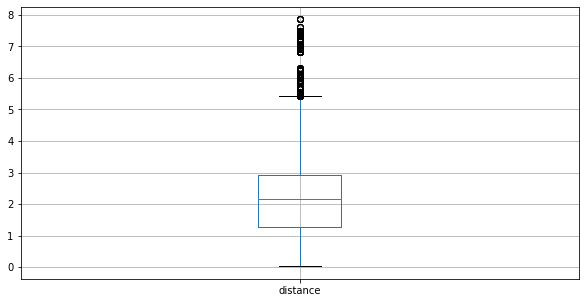

In [366]:
df.boxplot(column =['distance'], grid = True, figsize=(10,5))

In [367]:
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

In [368]:
df.shape

(510321, 12)

In [369]:
df = df[~((df['distance'] < (Q1 - 1.5 * IQR)) | (df['distance'] > (Q3 + 1.5 * IQR)))]

In [370]:
df.shape

(504969, 12)

In [371]:
df.head()

,distance,destination,source,surge_multiplier,id,price,cab_type_Uber,date,hour,source_destination,Lyft_Type,Uber_Type
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,8.0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0
2,2.00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,10.5,0,2018-12-16,2,Back BayHaymarket Square,2.0,0.0
3,3.98,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,22.5,0,2018-12-01,1,Financial DistrictNortheastern University,3.0,0.0
4,1.49,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,7.0,0,2018-11-30,14,Back BayNortheastern University,2.0,0.0
5,1.97,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,29.5,1,2018-11-29,4,Northeastern UniversityBeacon Hill,0.0,6.0


# weather df


In [372]:
w=pd.read_csv('weather.csv')
w.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


## General Properties

In [373]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


#### time_stamp : is coming as float64. Since timestamp indcates date so we can convert it into datetime.
#### there is null values in rain (we will handle it later after some invstigation)

In [374]:
# convert time stamp to date
w["date"]=[datetime.fromtimestamp(x) for x in w['time_stamp']]

### we made hour coulmn

In [375]:
w = w.assign(hour = w.date.dt.hour) 

In [376]:
w['date'] = w['date'].dt.date
w['date'] = w['date'].astype('datetime64[ns]')

In [377]:
w.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date,hour
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-17,1
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-17,1
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-17,1
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-17,1
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-17,1


#### we replaced timestamp with date coulmn and hour so we are going to drop time stamp coulmn

In [378]:
w = w.drop(['time_stamp'],axis=1)

### handling rain nulls

In [379]:
w.rain.isnull().sum()

5382

### 85 % of weather data have null values in rain

In [380]:
w.rain.isnull().sum()/w.shape[0] *100

85.75525812619503

In [381]:
w.head()

,temp,location,clouds,pressure,rain,humidity,wind,date,hour
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-17,1
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-17,1
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07,2018-12-17,1
3,42.11,Fenway,1.0,1012.13,0.0969,0.77,11.09,2018-12-17,1
4,43.13,Financial District,1.0,1012.14,0.1786,0.75,11.49,2018-12-17,1


### we can see that many obseravations of weather in the same location made in the same day but in different hours

In [382]:
date = w.date.value_counts().index
location = w.location.value_counts().index

In [383]:
ans=0;
for i in date:
    for j in location:
        if (w[(w.date == i) & (w.location==j) ].rain.isnull().sum()) == w[(w.date == i) & (w.location==j) ].shape[0]  :
            ans+=1

### only 74 row from 6 thoundas had one obseravation of weather and rain was null 

In [384]:
ans

74

In [385]:
w[(w['date']== "2018-12-17") & (w.location=='Beacon Hill') ].head()

,temp,location,clouds,pressure,rain,humidity,wind,date,hour
1,42.43,Beacon Hill,1.00,1012.15,0.1846,0.76,11.32,2018-12-17,1
81,39.78,Beacon Hill,0.95,1000.89,NaN,0.81,6.44,2018-12-17,19
324,38.85,Beacon Hill,1.00,1005.54,NaN,0.90,11.01,2018-12-17,8
990,41.76,Beacon Hill,1.00,1011.52,0.0510,0.83,10.80,2018-12-17,2
1433,38.93,Beacon Hill,1.00,1006.40,NaN,0.89,11.60,2018-12-17,7


In [386]:
w[(w['date']== "2018-12-17") & (w.location=='Boston University') ].head()

,temp,location,clouds,pressure,rain,humidity,wind,date,hour
2,42.50,Boston University,1.00,1012.15,0.1089,0.76,11.07,2018-12-17,1
82,40.15,Boston University,0.94,1000.91,NaN,0.80,6.44,2018-12-17,19
325,38.77,Boston University,1.00,1005.57,NaN,0.90,10.69,2018-12-17,8
728,40.37,Boston University,1.00,1010.95,0.0150,0.90,10.18,2018-12-17,3
760,40.44,Boston University,0.78,1000.01,NaN,0.73,9.31,2018-12-17,22


In [387]:
w.head()

,temp,location,clouds,pressure,rain,humidity,wind,date,hour
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-17,1
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-17,1
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07,2018-12-17,1
3,42.11,Fenway,1.0,1012.13,0.0969,0.77,11.09,2018-12-17,1
4,43.13,Financial District,1.0,1012.14,0.1786,0.75,11.49,2018-12-17,1


## we need to imputate the missing values of rain in each day
# we will use the K-Nearest Neighbors imputation method

In [388]:
# we made temp dataframe identical to weather
tmp = w

In [389]:
tmp.head()

,temp,location,clouds,pressure,rain,humidity,wind,date,hour
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-17,1
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-17,1
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07,2018-12-17,1
3,42.11,Fenway,1.0,1012.13,0.0969,0.77,11.09,2018-12-17,1
4,43.13,Financial District,1.0,1012.14,0.1786,0.75,11.49,2018-12-17,1


#### KNN imputer does not recognize text data values, so we are going to drop date coulmn and work with time stamp coulmn

In [390]:
# tmp = tmp.drop(['location'],axis=1)
# tmp = tmp.drop(['date'],axis=1)

tmp = tmp.assign(month=tmp.date.dt.month)
tmp = tmp.assign(day=tmp.date.dt.day)
tmp = pd.get_dummies(tmp, columns=['location'])
tmp = tmp.drop(['date'],axis=1)
tmp = tmp.drop(['hour'],axis=1)
#tmp = tmp.drop(['hour'],axis=1)

###  KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. 

### we will use Scikit-Learn’s MinMaxScaler which will scale our variables to have values between 0 and 1.

In [391]:
scaler = MinMaxScaler()
tmp = pd.DataFrame(scaler.fit_transform(tmp), columns = tmp.columns)

w.rain=(w.rain-w.rain.min())/(w.rain.max()-w.rain.min())

In [392]:
tmp.head()

,temp,clouds,pressure,rain,humidity,wind,month,day,location_Back Bay,location_Beacon Hill,location_Boston University,location_Fenway,location_Financial District,location_Haymarket Square,location_North End,location_North Station,location_Northeastern University,location_South Station,location_Theatre District,location_West End
0,0.637049,1.0,0.509708,0.157079,0.592593,0.612633,1.0,0.551724,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.637329,1.0,0.509921,0.236259,0.574074,0.616546,1.0,0.551724,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.639285,1.0,0.509921,0.139270,0.574074,0.602571,1.0,0.551724,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.628388,1.0,0.509494,0.123895,0.592593,0.603689,1.0,0.551724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.656887,1.0,0.509708,0.228571,0.555556,0.626048,1.0,0.551724,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KNN Imputation

In [393]:
imputer = KNNImputer(n_neighbors=5)
tmp = pd.DataFrame(imputer.fit_transform(tmp),columns = tmp.columns)


In [394]:
tmp.isnull().sum()

temp                                0
clouds                              0
pressure                            0
rain                                0
humidity                            0
wind                                0
month                               0
day                                 0
location_Back Bay                   0
location_Beacon Hill                0
location_Boston University          0
location_Fenway                     0
location_Financial District         0
location_Haymarket Square           0
location_North End                  0
location_North Station              0
location_Northeastern University    0
location_South Station              0
location_Theatre District           0
location_West End                   0
dtype: int64

In [395]:
tmp.shape

(6276, 20)

### merging weather data with imputed data 

In [396]:
w = pd.merge(w.loc[:,w.columns.isin( ['location','time_stamp','date','hour','rain'])], tmp.loc[:,tmp.columns.isin(['temp','clouds','pressure','rain','humidity','wind'])], 
             left_index=True, right_index=True)

In [397]:
w.shape

(6276, 10)

In [398]:
w.head()

,location,rain_x,date,hour,temp,clouds,pressure,rain_y,humidity,wind
0,Back Bay,0.157079,2018-12-17,1,0.637049,1.0,0.509708,0.157079,0.592593,0.612633
1,Beacon Hill,0.236259,2018-12-17,1,0.637329,1.0,0.509921,0.236259,0.574074,0.616546
2,Boston University,0.139270,2018-12-17,1,0.639285,1.0,0.509921,0.139270,0.574074,0.602571
3,Fenway,0.123895,2018-12-17,1,0.628388,1.0,0.509494,0.123895,0.592593,0.603689
4,Financial District,0.228571,2018-12-17,1,0.656887,1.0,0.509708,0.228571,0.555556,0.626048


In [399]:
w.head()

,location,rain_x,date,hour,temp,clouds,pressure,rain_y,humidity,wind
0,Back Bay,0.157079,2018-12-17,1,0.637049,1.0,0.509708,0.157079,0.592593,0.612633
1,Beacon Hill,0.236259,2018-12-17,1,0.637329,1.0,0.509921,0.236259,0.574074,0.616546
2,Boston University,0.139270,2018-12-17,1,0.639285,1.0,0.509921,0.139270,0.574074,0.602571
3,Fenway,0.123895,2018-12-17,1,0.628388,1.0,0.509494,0.123895,0.592593,0.603689
4,Financial District,0.228571,2018-12-17,1,0.656887,1.0,0.509708,0.228571,0.555556,0.626048


In [400]:
w[(w['date']== "2018-12-17") & (w.location=='Boston University') ]

,location,rain_x,date,hour,temp,clouds,pressure,rain_y,humidity,wind
2,Boston University,0.139270,2018-12-17,1,0.639285,1.00,0.509921,0.139270,0.574074,0.602571
82,Boston University,NaN,2018-12-17,19,0.573624,0.94,0.270109,0.018424,0.648148,0.343767
325,Boston University,NaN,2018-12-17,8,0.535066,1.00,0.369533,0.007431,0.833333,0.581330
728,Boston University,0.018962,2018-12-17,3,0.579771,1.00,0.484318,0.018962,0.833333,0.552823
760,Boston University,NaN,2018-12-17,22,0.581727,0.78,0.250907,0.073414,0.518519,0.504192
991,Boston University,0.077899,2018-12-17,2,0.618888,0.95,0.490506,0.077899,0.703704,0.570151
1243,Boston University,NaN,2018-12-17,7,0.536742,1.00,0.388095,0.007431,0.814815,0.617663
1311,Boston University,NaN,2018-12-17,11,0.467728,1.00,0.337743,0.004331,0.870370,0.517608
1791,Boston University,NaN,2018-12-17,20,0.596256,0.93,0.254534,0.043152,0.611111,0.402459
2476,Boston University,NaN,2018-12-17,6,0.541492,1.00,0.406017,0.007431,0.833333,0.596982


## how to merge ?!

In [401]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
print("weather year: " , w.date.dt.year.value_counts())
print()
print("taxi year: " , df.date.dt.year.value_counts())

weather year:  2018    6276
Name: date, dtype: int64

taxi year:  2018    504969
Name: date, dtype: int64


In [402]:
print("weather year: " , w.date.dt.month.value_counts().index.sort_values())
print()
print("taxi year: " , df.date.dt.month.value_counts().index.sort_values())

weather year:  Int64Index([11, 12], dtype='int64')

taxi year:  Int64Index([11, 12], dtype='int64')


In [403]:
print("weather year: " , w.date.dt.day.value_counts().index.sort_values())
print()
print("taxi year: " , df.date.dt.day.value_counts().index.sort_values())

weather year:  Int64Index([1, 2, 3, 4, 10, 13, 14, 15, 16, 17, 18, 26, 27, 28, 29, 30], dtype='int64')

taxi year:  Int64Index([1, 2, 3, 4, 10, 13, 14, 15, 16, 17, 18, 26, 27, 28, 29, 30], dtype='int64')


In [404]:
print("weather year: " , w.date.dt.hour.value_counts().index.sort_values())
print()
print("taxi year: " , df.date.dt.hour.value_counts().index.sort_values())

weather year:  Int64Index([0], dtype='int64')

taxi year:  Int64Index([0], dtype='int64')


In [405]:
w.head()

,location,rain_x,date,hour,temp,clouds,pressure,rain_y,humidity,wind
0,Back Bay,0.157079,2018-12-17,1,0.637049,1.0,0.509708,0.157079,0.592593,0.612633
1,Beacon Hill,0.236259,2018-12-17,1,0.637329,1.0,0.509921,0.236259,0.574074,0.616546
2,Boston University,0.139270,2018-12-17,1,0.639285,1.0,0.509921,0.139270,0.574074,0.602571
3,Fenway,0.123895,2018-12-17,1,0.628388,1.0,0.509494,0.123895,0.592593,0.603689
4,Financial District,0.228571,2018-12-17,1,0.656887,1.0,0.509708,0.228571,0.555556,0.626048


## do we have for each trip a weather value ?

In [406]:
data_merged= pd.merge(df, w, left_on=['date','hour','source'],right_on=['date','hour','location'], how='inner')

In [407]:
data_merged.shape

(920863, 20)

In [408]:
data_merged.head(1)

,distance,destination,source,surge_multiplier,id,price,cab_type_Uber,date,hour,source_destination,Lyft_Type,Uber_Type,location,rain_x,temp,clouds,pressure,rain_y,humidity,wind
0,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,8.0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0,Beacon Hill,NaN,0.384186,0.14,0.06294,0.002178,0.703704,0.299609


In [409]:
data=data_merged[data_merged.duplicated()]
display(data_merged[data_merged['id']=='f9e7e7e6-b309-479b-9f90-bf26a1870c81'])
# data_merged = data_merged.drop_duplicates(subset='id', keep="first")
data_grouped=data_merged.groupby(['distance','destination','source','surge_multiplier','id','price','date','hour','source_destination','Lyft_Type','Uber_Type','location'])
data_grouped=data_grouped.mean().reset_index()

,distance,destination,source,surge_multiplier,id,price,cab_type_Uber,date,hour,source_destination,Lyft_Type,Uber_Type,location,rain_x,temp,clouds,pressure,rain_y,humidity,wind
0,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,8.0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0,Beacon Hill,NaN,0.384186,0.14,0.062940,0.002178,0.703704,0.299609
1,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,8.0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0,Beacon Hill,NaN,0.369098,0.16,0.067421,0.002178,0.740741,0.340414
2,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,8.0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0,Beacon Hill,NaN,0.385583,0.14,0.062727,0.002178,0.703704,0.296814
3,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,8.0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0,Beacon Hill,NaN,0.386421,0.13,0.062513,0.002178,0.703704,0.294019
4,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,8.0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0,Beacon Hill,NaN,0.386421,0.13,0.062513,0.002178,0.703704,0.294019
5,2.27,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,8.0,1,2018-11-28,12,Boston UniversityBeacon Hill,0.0,1.0,Beacon Hill,NaN,0.387538,0.13,0.062087,0.002178,0.703704,0.291783


In [410]:
display(data_grouped[data_grouped.duplicated()])
data_grouped.shape

,distance,destination,source,surge_multiplier,id,price,date,hour,source_destination,Lyft_Type,Uber_Type,location,cab_type_Uber,rain_x,temp,clouds,pressure,rain_y,humidity,wind


(500519, 20)

# building model 

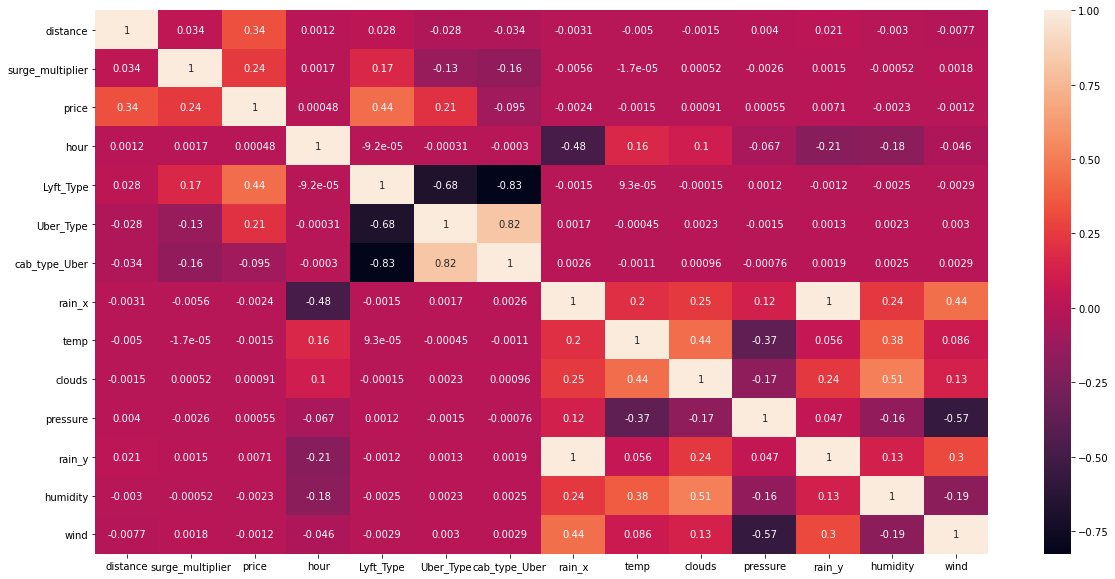

In [411]:
# setting the parameter values
annot = True

# plotting the heatmap
ax, fig = plt.subplots(figsize=[20,10])
hm = sns.heatmap(data=data_grouped.corr(),
                annot=annot)
plt.show()

In [412]:
# 	distance surge_multiplier	price Lyft_Type	Uber_Type temp	clouds	pressure	rain_y	humidity	wind
data_grouped.drop(['destination','source','id','date','hour','source_destination','location','rain_x','location'],axis=1,inplace=True)
data_grouped.head()

,distance,surge_multiplier,price,Lyft_Type,Uber_Type,cab_type_Uber,temp,clouds,pressure,rain_y,humidity,wind
0,0.02,1.0,6.5,0.0,2.0,1,0.903884,0.91,0.704929,0.055862,0.518519,0.294578
1,0.02,1.0,15.0,0.0,5.0,1,0.903884,0.91,0.704929,0.055862,0.518519,0.294578
2,0.02,1.0,27.5,0.0,6.0,1,0.293657,0.11,0.724131,0.026445,0.240741,0.271660
3,0.02,1.0,8.5,0.0,3.0,1,0.560678,0.29,0.077164,0.001999,0.376543,0.485187
4,0.02,1.0,15.0,0.0,5.0,1,0.496787,0.88,0.312780,0.011787,0.777778,0.410844


In [413]:
data_grouped.distance.value_counts()

2.66    6280
2.32    6276
2.84    5970
1.41    5371
1.25    5303
        ... 
4.99       4
4.85       4
4.89       3
5.06       3
3.84       3
Name: distance, Length: 511, dtype: int64

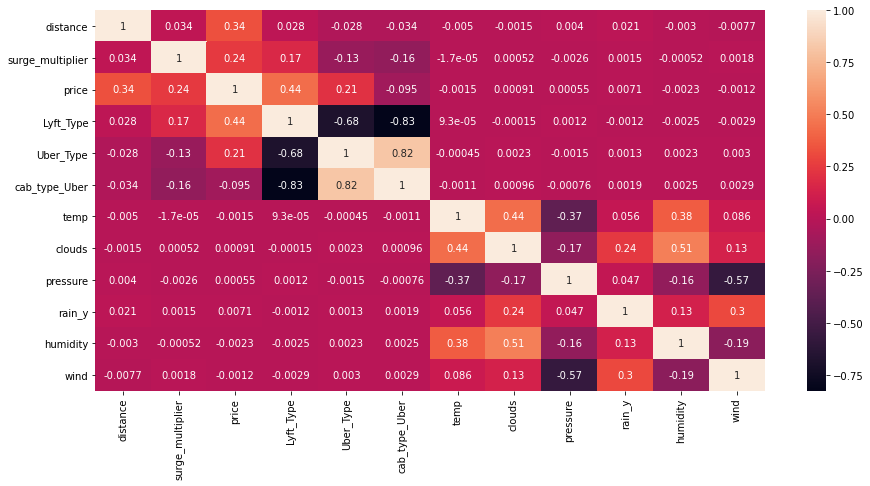

In [414]:
annot = True

# plotting the heatmap
ax, fig = plt.subplots(figsize=[15,7])
hm = sns.heatmap(data=data_grouped.corr(),
                annot=annot)
plt.show()

In [509]:
poly_features = PolynomialFeatures(degree=4)

In [510]:
colums=list(data_grouped.columns)
colums.remove('price')
print(colums)
X=data_grouped.loc[:,['distance', 'surge_multiplier', 'Lyft_Type', 'Uber_Type', 'cab_type_Uber']]
Y=data_grouped['price']


X_train_poly = poly_features.fit_transform(X)

['distance', 'surge_multiplier', 'Lyft_Type', 'Uber_Type', 'cab_type_Uber', 'temp', 'clouds', 'pressure', 'rain_y', 'humidity', 'wind']


In [507]:
data=data_grouped.loc[:,['distance', 'surge_multiplier', 'Lyft_Type', 'Uber_Type', 'cab_type_Uber','price']]

In [418]:
# data.to_csv("model_data.csv", encoding='utf-8')

In [511]:
# Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_poly, Y, test_size = 0.40,shuffle=True,random_state=10)

In [512]:
import time

poly_model = linear_model.LinearRegression()
start_time = time.time()
poly_model.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))


--- 12.630983591079712 seconds ---


In [421]:
# import pickle
# with open("poly_model",'wb') as files:
#     pickle.dump(poly_model,files)

In [513]:



# predicting on test data-set
prediction= poly_model.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))


--- 30.99446678161621 seconds ---


In [514]:
# print('Co-efficient of linear regression',poly_model.coef_)
print('Intercept of linear regression model',poly_model.intercept_)
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))
print("r2_score:",metrics.r2_score(prediction,y_test)*100,"%")

Intercept of linear regression model 15.182620895059692
Mean Square Error 6.311930208863414
r2_score: 91.9999449042723 %


In [480]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40,shuffle=True,random_state=10)

In [481]:
# poly_model = linear_model.LinearRegression()
# start_time = time.time()
# poly_model.fit(X_train, y_train)
# print("--- %s seconds ---" % (time.time() - start_time))

--- 0.08800053596496582 seconds ---


In [483]:

# prediction= poly_model.predict(X_test)


In [484]:
# print('Intercept of linear regression model',poly_model.intercept_)
# print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))
# print("r2_score:",metrics.r2_score(prediction,y_test)*100,"%")

Intercept of linear regression model -24.244037992606813
Mean Square Error 15.5706890836139
r2_score: 77.61540442071781 %


In [524]:
def check_dataset(datasetname):
    # important columns[distance - cab_type - lyft_type - uber_type]
    data=pd.read_csv(datasetname)
    for i in range(data.shape[0]):
#         distance imputation
        if (data.iloc[i,0] <=0.0)or (data.iloc[i,0]==np.nan):
            if ((data.iloc[i,1]!=np.nan or data.iloc[i,1]!="") and (data.iloc[i,2]!=np.nan or data.iloc[i,2]!="") ):
                    lat1=street[street.stree_name==data.iloc[i,1]].latitude
                    lat2=street[street.stree_name==data.iloc[i,2]].latitude
                    longi=street[street.stree_name==data.iloc[i,1]].longitude
                    logi2=street[street.stree_name==data.iloc[i,2]].longitude
                    
                    data.iloc[i,0]=distance(lat1,lat2,longi,longi2)
            
            else:
                    data.iloc[i,0]=data.distance.mean()
                    
        
        if ((data.iloc[i,7] ==np.nan)or (data.iloc[i,7]=="")):
                    data.iloc[i,7]=id_name_dic[data.iloc[i,6]]
        
        if ((data.iloc[i,1] =="")or (data.iloc[i,1]==np.nan)):
            if data.iloc[i,7] in uber_names:
                    data.iloc[i,1]="Uber"
            elif data.iloc[i,7] in lyft_names:
                    data.iloc[i,1]="Lyft"
        
        if (data.iloc[i,5] <=0.0)or (data.iloc[i,5]==np.nan):
                    data.iloc[i,5]=1.0
       
    return data

In [525]:
csv_name="taxi-tas-regression-test.csv"

In [526]:
data=pd.read_csv(csv_name)

In [527]:
data=check_dataset(csv_name)

In [528]:
data.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,2.14,Lyft,1.543230e+12,South Station,North Station,1.0,d17c8f8f-5018-4dc1-b86b-0e67849e5f57,lyft_luxsuv,Lux Black XL,27.5
1,1.08,Uber,1.543280e+12,North End,North Station,1.0,4258d0c6-e1e5-45fb-bcee-d2a02aa5e6b0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,6.5
2,0.57,Lyft,1.543630e+12,North Station,Haymarket Square,1.0,a0a9b20e-d5ed-4eab-b2a5-d6ebd5eb3214,lyft_plus,Lyft XL,9.0
3,1.08,Lyft,1.543590e+12,Northeastern University,Back Bay,1.0,11f9ed79-2c2c-465a-8501-da97893ebcfc,lyft,Lyft,7.0
4,3.20,Uber,1.543240e+12,Financial District,Northeastern University,1.0,be3939d1-a5ee-43cc-a8ab-6f0da31594c5,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,11.0


In [529]:

# data=check_dataset(csv_name)
# data=data[:,1:]
data.drop(['time_stamp','destination','source','id','product_id'],axis=1,inplace=True)
data.cab_type=data.cab_type.str.lower()
data.name=data.name.str.lower()
data= pd.get_dummies(data, columns=["cab_type"])
data.drop(['cab_type_lyft'],axis=1,inplace=True)

lyft={'lux black xl':6,'lux black':5,'lux':4,'lyft xl':3,'lyft':2,'shared':1}
lyft_map=[{'col':'Lyft_Type','mapping':lyft}]

data['Lyft_Type']=data['name']
encodeing= ce.OrdinalEncoder(cols=['Lyft_Type'],return_df=True,mapping=lyft_map)
data=encodeing.fit_transform(data)
data.loc[data.Lyft_Type <1, 'Lyft_Type'] = 0

uber={'black suv':6,'black':5,'wav':4,'uberxl':3,'uberx':2,'uberpool':1}
uber_map=[{'col':'Uber_Type','mapping':uber}]
data['Uber_Type']=data['name']
encodeing= ce.OrdinalEncoder(cols=['Uber_Type'],return_df=True,mapping=uber_map)
data=encodeing.fit_transform(data)
data.loc[data.Uber_Type <1, 'Uber_Type'] = 0

data.drop(['name'], axis = 1,inplace=True)
X_input=data.loc[:,['distance', 'surge_multiplier', 'Lyft_Type', 'Uber_Type', 'cab_type_uber']]
Y_input=data['price']

In [530]:
prediction= poly_model.predict(poly_features.fit_transform(X_input))

In [520]:
len(prediction)

18498

In [521]:
len(Y_input)

18498

In [531]:
print('Intercept of linear regression model',poly_model.intercept_)
print('Mean Square Error', metrics.mean_squared_error(Y_input, prediction))
print("r2_score:",metrics.r2_score(prediction,Y_input)*100,"%")

Intercept of linear regression model 15.182620895059692
Mean Square Error 7.0357075172465375
r2_score: 91.15417433668233 %
